## Object detection
https://python.deepstack.cc/object-detection

Run with:
```
docker run -e VISION-DETECTION=True -v localstorage:/datastore -p 5000:5000 -d deepquestai/deepstack:noavx
```

Or on pi:
```
sudo deepstack start "VISION-DETECTION=True PORT=5000"
```

In [ ]:
ls

In [1]:
import requests
import matplotlib.pyplot as plt 
from PIL import Image, ImageDraw
%matplotlib inline

#IP = "localhost"
IP = "192.168.1.110" # pi pan tilt
#IP = "192.168.1.69" # pi zero
PORT = "5000"

ATTR_CONFIDENCE = 80
TARGET = 'person'

In [2]:
#img_file = "test-image3.jpg"
#img_file = "blank.jpg" # bounding boxes are wrong..
img_file = "family.jpg" #

<class 'PIL.JpegImagePlugin.JpegImageFile'>
(960, 540)


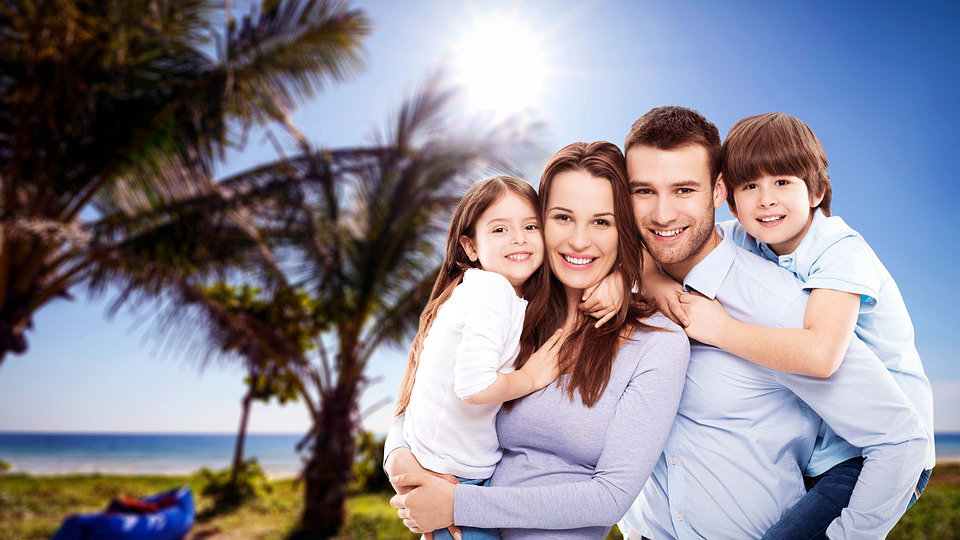

In [3]:
image = Image.open(img_file)
print(type(image))
print(image.size)
display(image)

In [4]:
%%time
image_data = open(img_file,"rb").read()
response = requests.post(f"http://{IP}:{PORT}/v1/vision/detection", files={"image":image_data})

CPU times: user 8.44 ms, sys: 5.36 ms, total: 13.8 ms
Wall time: 565 ms


In [5]:
response.status_code

200

In [6]:
response.json()

{'predictions': [{'confidence': 0.98828125,
   'label': 'person',
   'x_max': 932,
   'x_min': 664,
   'y_max': 540,
   'y_min': 104},
  {'confidence': 0.83984375,
   'label': 'person',
   'x_max': 731,
   'x_min': 459,
   'y_max': 539,
   'y_min': 132},
  {'confidence': 0.66015625,
   'label': 'person',
   'x_max': 655,
   'x_min': 410,
   'y_max': 540,
   'y_min': 145},
  {'confidence': 0.58203125,
   'label': 'person',
   'x_max': 552,
   'x_min': 383,
   'y_max': 540,
   'y_min': 145},
  {'confidence': 0.26953125,
   'label': 'person',
   'x_max': 844,
   'x_min': 536,
   'y_max': 532,
   'y_min': 110},
  {'confidence': 0.16015625,
   'label': 'bench',
   'x_max': 948,
   'x_min': 5,
   'y_max': 540,
   'y_min': 558},
  {'confidence': 0.16015625,
   'label': 'person',
   'x_max': 729,
   'x_min': 613,
   'y_max': 353,
   'y_min': 112},
  {'confidence': 0.16015625,
   'label': 'person',
   'x_max': 659,
   'x_min': 502,
   'y_max': 457,
   'y_min': 152},
  {'confidence': 0.12109375,

In [ ]:
predictions = response.json()['predictions']

In [ ]:
len(predictions)

In [ ]:
def get_object_classes(predictions):
    """
    Get a list of the unique object classes predicted.
    """
    classes = [pred['label'] for pred in predictions]
    return set(classes)

In [ ]:
classes = get_object_classes(predictions)
classes

In [ ]:
def format_confidence(confidence):
    """Takes a confidence from the API like 
       0.55623 and returne 55.6 (%).
    """
    return round(float(confidence)*100, 1)

format_confidence(0.55623)

In [ ]:
def get_confidences_above_threshold(confidences, threshold):
    """Takes a list of confidences and returns those above a threshold."""
    return [val for val in confidences if val >= threshold]

get_confidences_above_threshold([0.2, 0.5, 0.6], 0.5)

In [ ]:
def get_object_instances(predictions, target):
    """
    Return the number of instances of a target class.
    """
    targets_identified = [format_confidece(pred['confidence']) for pred in predictions if pred['label'] == target]
    return targets_identified

In [ ]:
get_object_instances(predictions, TARGET)

In [ ]:
def get_objects_summary(predictions):
    """
    Get a summary of the objects detected.
    """
    classes = get_object_classes(predictions)
    return {class_cat : get_object_instances(predictions, target=class_cat) 
            for class_cat in classes}

In [ ]:
get_objects_summary(predictions)

## Display boxes

In [ ]:
def draw_box(draw, prediction, text='', color=(255, 0, 0)):
    """Draw bounding box on image."""
    (left, right, top, bottom) = (prediction['x_min'], prediction['x_max'], prediction['y_min'], prediction['y_max'])
    draw.line([(left, top), (left, bottom), (right, bottom), (right, top), (left, top)], width=5, fill=color)
    if text:
        draw.text((left, abs(top-15)), text, fill=color)

In [ ]:
draw = ImageDraw.Draw(image)

for prediction in predictions:
    prediction_confidence = format_confidence(prediction['confidence'])
    if prediction['label'] == TARGET and prediction_confidence >= ATTR_CONFIDENCE:
        draw_box(draw, prediction, str(prediction_confidence))
        
    
display(image)

In [ ]:
image.save('boxed_img.jpg')

Issue for boxes -> https://forum.deepstack.cc/t/bounding-boxes-are-wrong/77/2

In [ ]:
a = 2
b = 3
if a and b >= 1:
    print('Yes')